## Add Dropout layer to avoid overfitting

In [1]:
# Overfitting and underfitting are common phenomena in the field of machine learning and 
# the techniques used to tackle overfitting problem is called regularization. 
# In deep learning, dropout regularization is used to randomly drop neurons from 
# hidden layers and this helps with generalization.
# We will implement artificial neural network for binary classification problem and 
# see how using dropout layer can increase the performance of the model.

In [2]:
import pandas as pd

df = pd.read_csv("DataSets/Customer_Churn_Cleaned.csv")
df

,Unnamed: 0,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,2,0,0,0,0.027778,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,3,0,0,0,0.625000,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,4,0,0,0,0.027778,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,1,1,0.333333,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,7039,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,7040,0,1,1,0.152778,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,7041,1,1,0,0.055556,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [3]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [4]:
df.shape

(7043, 28)

In [5]:
X = df.drop(columns = ['Churn'])
y = df.Churn

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
model = keras.Sequential([
        keras.layers.Dense(27,input_shape = (27,),activation = 'relu'),
#         keras.layers.Dropout(0.5),
        keras.layers.Dense(18,activation = 'relu'),
#         keras.layers.Dropout(0.5),
        keras.layers.Dense(9,activation = 'relu'),
#         keras.layers.Dropout(0.5), 
        keras.layers.Dense(1,activation = 'sigmoid')

])
model.compile(
     optimizer = 'adam',
     loss = 'binary_crossentropy',
     metrics = ['accuracy']
 )
# After Training , If Training accuracy is more than testing accuracy means model may be overfitted
# To overcome with this problem use dropout layer , which drop random neuros in each iteration

In [9]:
model.fit(X_train,y_train,epochs = 100,batch_size = 20)
# Refer mini batch gradient descent , Here we use batch of five sample for each iteration

Epoch 1/100
282/282 [==============================] - 1s 936us/step - loss: 0.4852 - accuracy: 0.7469
Epoch 2/100
282/282 [==============================] - 0s 987us/step - loss: 0.4274 - accuracy: 0.7950
Epoch 3/100
282/282 [==============================] - 0s 908us/step - loss: 0.4214 - accuracy: 0.8007
Epoch 4/100
282/282 [==============================] - 0s 837us/step - loss: 0.4191 - accuracy: 0.8044
Epoch 5/100
282/282 [==============================] - 0s 735us/step - loss: 0.4177 - accuracy: 0.8030
Epoch 6/100
282/282 [==============================] - 0s 711us/step - loss: 0.4170 - accuracy: 0.8033
Epoch 7/100
282/282 [==============================] - 0s 736us/step - loss: 0.4134 - accuracy: 0.8088
Epoch 8/100
282/282 [==============================] - 0s 675us/step - loss: 0.4110 - accuracy: 0.8081
Epoch 9/100
282/282 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8087
Epoch 10/100
282/282 [==============================] - 0s 1ms/step - loss:

282/282 [==============================] - 0s 788us/step - loss: 0.3209 - accuracy: 0.8490
Epoch 80/100
282/282 [==============================] - 0s 644us/step - loss: 0.3197 - accuracy: 0.8539
Epoch 81/100
282/282 [==============================] - 0s 616us/step - loss: 0.3199 - accuracy: 0.8516
Epoch 82/100
282/282 [==============================] - 0s 759us/step - loss: 0.3198 - accuracy: 0.8521
Epoch 83/100
282/282 [==============================] - 0s 702us/step - loss: 0.3185 - accuracy: 0.8506
Epoch 84/100
282/282 [==============================] - 0s 612us/step - loss: 0.3160 - accuracy: 0.8543
Epoch 85/100
282/282 [==============================] - 0s 660us/step - loss: 0.3165 - accuracy: 0.8527
Epoch 86/100
282/282 [==============================] - 0s 710us/step - loss: 0.3155 - accuracy: 0.8532
Epoch 87/100
282/282 [==============================] - 0s 608us/step - loss: 0.3153 - accuracy: 0.8527
Epoch 88/100
282/282 [==============================] - 0s 615us/step - loss:

In [10]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 556us/step - loss: 0.5696 - accuracy: 0.7530


[0.5695805549621582, 0.7530163526535034]

In [11]:
y_predict = model.predict(X_test)
y_predict[:5]

array([[0.48495564],
       [0.9802861 ],
       [0.29093668],
       [0.44450665],
       [0.3590845 ]], dtype=float32)

In [12]:
predicted = []
for i in y_predict:
    if i >= 0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [13]:
predicted[:5]

[0, 1, 0, 0, 0]

In [14]:
truth = y_test
truth[:5]

6418    0
1948    1
4497    0
66      0
1705    0
Name: Churn, dtype: int64

In [15]:
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
cm = confusion_matrix(truth,predicted)
cm

array([[864, 202],
       [146, 197]], dtype=int64)

In [17]:
print(classification_report(truth,predicted))
# Here f1-score is importent
# Which shows accuracy for each class(0/1)
# Here f1-score for class 0 is good but f1-score of 1 is very low so itis clearly imbalanced dataset
# To balance this data refer next note-book

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1066
           1       0.49      0.57      0.53       343

    accuracy                           0.75      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.77      0.75      0.76      1409



<AxesSubplot:>

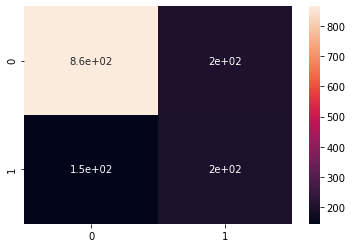

In [18]:
import seaborn as sn
sn.heatmap(cm,annot=True)